In [1]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns 

In [2]:
from google.colab import files
uploaded=files.upload()

Saving conversion_data.csv to conversion_data (1).csv


In [62]:
dataset = pd.read_csv('conversion_data.csv')

In [63]:
dataset.head()

,country,age,new_user,source,total_pages_visited,converted
0,UK,25,1,Ads,1,0
1,US,23,1,Seo,5,0
2,US,28,1,Seo,4,0
3,China,39,1,Seo,5,0
4,US,30,1,Seo,6,0


In [64]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 316200 entries, 0 to 316199
Data columns (total 6 columns):
 #   Column               Non-Null Count   Dtype 
---  ------               --------------   ----- 
 0   country              316200 non-null  object
 1   age                  316200 non-null  int64 
 2   new_user             316200 non-null  int64 
 3   source               316200 non-null  object
 4   total_pages_visited  316200 non-null  int64 
 5   converted            316200 non-null  int64 
dtypes: int64(4), object(2)
memory usage: 14.5+ MB


##EDA

In [65]:
dataset.converted.unique()

array([0, 1])

In [66]:
dataset.age.unique()

array([ 25,  23,  28,  39,  30,  31,  27,  29,  38,  43,  24,  36,  37,
        33,  20,  35,  17,  50,  22,  18,  34,  19,  42,  32,  21,  48,
        40,  41,  26,  45,  44,  49,  46,  56,  52,  54,  51,  47,  53,
        60,  57,  55,  59,  61,  58,  62,  65,  63,  66,  67,  64,  68,
        69, 123,  70,  73,  77,  72,  79, 111])

In [67]:
dataset=dataset[dataset.age<100]

In [68]:
#Nombre total de conversions
chart_data=dataset.converted.value_counts()
chart_data

0    306000
1     10198
Name: converted, dtype: int64

Text(0.5, 1.0, 'Proportion des conversions \npar rapport aux consultations totales')

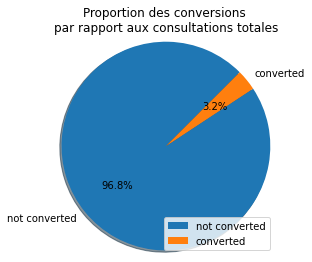

In [69]:
#Visualisation de la proportion des conversions
fig, ax =plt.subplots()
ax.pie(chart_data,
        autopct='%1.1f%%',
        labels=["not converted","converted"],
        shadow=True,
        startangle=45,
        radius=1.2
        )

plt.legend(loc="lower right")
plt.title("Proportion des conversions \npar rapport aux consultations totales")

Text(0.5, 1.0, 'Origines des consultations')

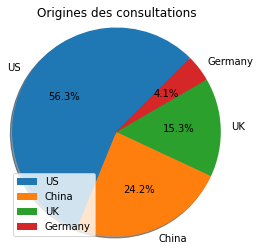

In [70]:
#Origines des consultations 
chart_data2=dataset.country.value_counts()
m=[labels for labels in dataset.country.value_counts().index]

fig, ax =plt.subplots()
ax.pie(chart_data2,
       labels=m,
        autopct='%1.1f%%',
        shadow=True,
        startangle=45,
        radius=1.2
        )

plt.legend(loc="lower left")
plt.title("Origines des consultations")

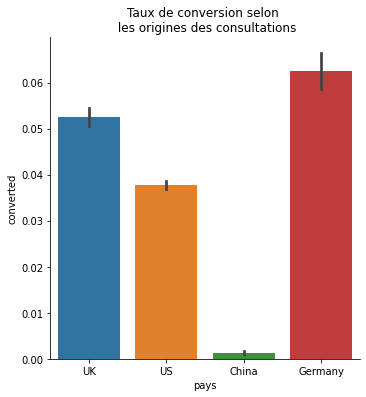

In [71]:
ax0=sns.catplot(x=dataset.columns[0],y=dataset.columns[5], data=dataset, kind='bar')
ax0.set(title="Taux de conversion selon \n les origines des consultations", xlabel="pays")

In [72]:
#création de groupes d'âge

labels=["17-25 ans","25-35 ans", "35-45 ans", "45-55 ans","55-70 ans"]

dataset["categorie_age"]=pd.cut(dataset.age, 
                                [17,25,35,45,55,70],
                                right=False,
                                labels=labels
                                )

In [73]:
#Calcul des moyennes
table_dataset=dataset.drop('country', axis=1)
table_dataset=table_dataset.drop('source', axis=1)
table_dataset.groupby("categorie_age").sum()/table_dataset.groupby("categorie_age").count()


,age,new_user,total_pages_visited,converted
categorie_age,,,,
17-25 ans,20.887623,0.678718,5.099316,0.055393
25-35 ans,29.404916,0.685207,4.860992,0.030692
35-45 ans,38.622159,0.689973,4.706112,0.015843
45-55 ans,47.897835,0.698846,4.639292,0.008844
55-70 ans,57.614137,0.697147,4.679637,0.005188


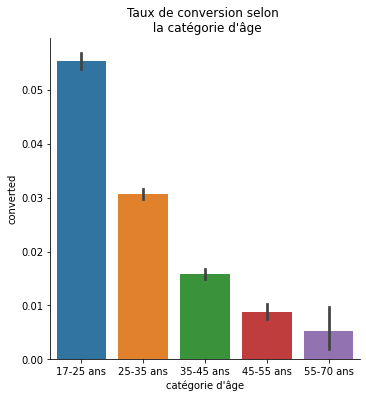

In [74]:
#visualisation des moyennes d'âge des conversions
ax1=sns.catplot(x=dataset.columns[6],y=dataset.columns[5], data=dataset, kind='bar')
ax1.set(title="Taux de conversion selon \n la catégorie d'âge", xlabel="catégorie d'âge")

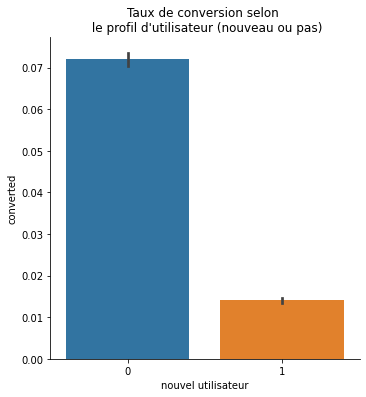

In [75]:
ax=sns.catplot(x=dataset.columns[2],y=dataset.columns[5], data=dataset, kind='bar')
ax.set(title="Taux de conversion selon \n le profil d'utilisateur (nouveau ou pas)", xlabel="nouvel utilisateur")

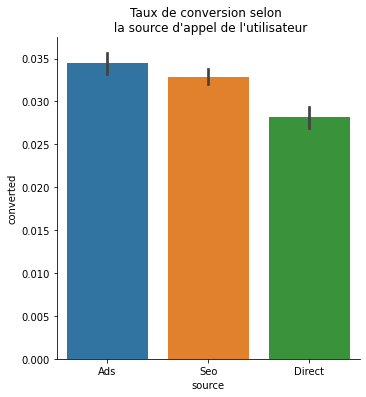

In [76]:
ax3=sns.catplot(x=dataset.columns[3],y=dataset.columns[5], data=dataset, kind='bar')
ax3.set(title="Taux de conversion selon \n la source d'appel de l'utilisateur")

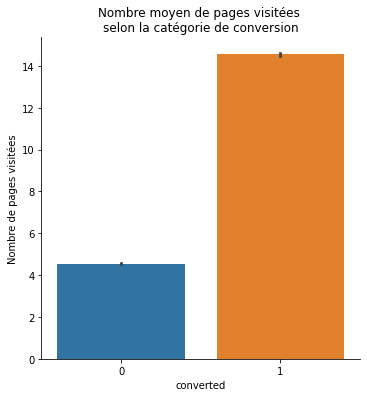

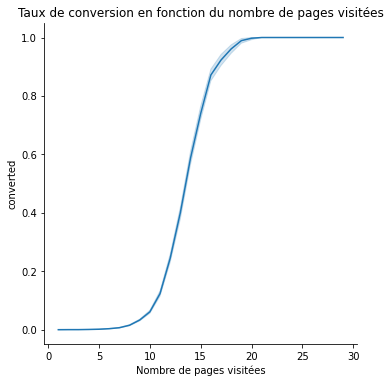

In [77]:
#plt.figure(figsize=(20,10))

ax4=sns.catplot(x=dataset.columns[5], y=dataset.columns[4], data=dataset, kind='bar')
ax4.set(title="Nombre moyen de pages visitées \nselon la catégorie de conversion", ylabel="Nombre de pages visitées")
ax5=sns.relplot(x=dataset.columns[4],y=dataset.columns[5], data=dataset, kind='line')
ax5.set(title="Taux de conversion en fonction du nombre de pages visitées", xlabel="Nombre de pages visitées")


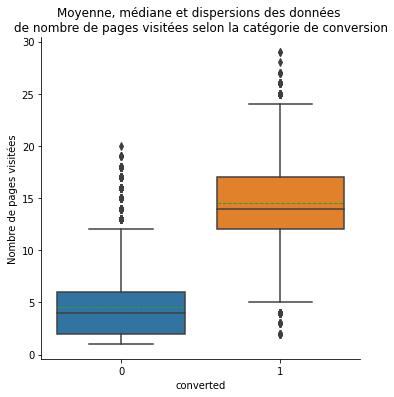

In [78]:
ax6=sns.catplot(x=dataset.columns[5], y=dataset.columns[4], data=dataset, kind='box', showmeans=True, meanline=True)
ax6.set(title="Moyenne, médiane et dispersions des données \nde nombre de pages visitées selon la catégorie de conversion", ylabel="Nombre de pages visitées")

In [79]:
#séparation du dataset en deux
X=dataset.drop('converted', axis=1)
y=dataset['converted']

In [80]:
#dummification des variables
dataset=pd.get_dummies(dataset, drop_first=False)

In [81]:
dataset.head()

,age,new_user,total_pages_visited,converted,country_China,country_Germany,country_UK,country_US,source_Ads,source_Direct,source_Seo,categorie_age_17-25 ans,categorie_age_25-35 ans,categorie_age_35-45 ans,categorie_age_45-55 ans,categorie_age_55-70 ans
0,25,1,1,0,0,0,1,0,1,0,0,0,1,0,0,0
1,23,1,5,0,0,0,0,1,0,0,1,1,0,0,0,0
2,28,1,4,0,0,0,0,1,0,0,1,0,1,0,0,0
3,39,1,5,0,1,0,0,0,0,0,1,0,0,1,0,0
4,30,1,6,0,0,0,0,1,0,0,1,0,1,0,0,0


In [82]:
#séparation du dataset en deux
X=dataset.drop('converted', axis=1)
y=dataset['converted']

In [83]:
X.columns

Index(['age', 'new_user', 'total_pages_visited', 'country_China',
       'country_Germany', 'country_UK', 'country_US', 'source_Ads',
       'source_Direct', 'source_Seo', 'categorie_age_17-25 ans',
       'categorie_age_25-35 ans', 'categorie_age_35-45 ans',
       'categorie_age_45-55 ans', 'categorie_age_55-70 ans'],
      dtype='object')

In [84]:
 #Métrique Chi2 pour classer les features importances

from sklearn.feature_selection import chi2
feature_importance = chi2(X, y)
feature_importance 

(array([5.62718512e+03, 2.30802259e+03, 2.02677372e+05, 2.34645220e+03,
        3.80880794e+02, 6.43466067e+02, 1.75677270e+02, 1.40112465e+01,
        3.86797846e+01, 2.01277614e+00, 1.43311541e+03, 1.06264027e+01,
        6.68127221e+02, 3.05691343e+02, 3.61864655e+01]),
 array([0.00000000e+000, 0.00000000e+000, 0.00000000e+000, 0.00000000e+000,
        8.00200871e-085, 5.89011424e-142, 4.25902331e-040, 1.81720465e-004,
        4.99354137e-010, 1.55979667e-001, 0.00000000e+000, 1.11484371e-003,
        2.55199793e-147, 1.89608404e-068, 1.79311578e-009]))

In [85]:
#Mise en dataframe
feature_ranking = pd.DataFrame(columns=X.columns, data=feature_importance, index=["Chi2 Score", "P-value"]).transpose()
feature_ranking.sort_values("Chi2 Score", ascending=False)

,Chi2 Score,P-value
total_pages_visited,202677.371688,0.000000e+00
age,5627.185122,0.000000e+00
country_China,2346.452197,0.000000e+00
new_user,2308.022594,0.000000e+00
categorie_age_17-25 ans,1433.115412,0.000000e+00
categorie_age_35-45 ans,668.127221,2.551998e-147
country_UK,643.466067,5.890114e-142
country_Germany,380.880794,8.002009e-85
categorie_age_45-55 ans,305.691343,1.896084e-68
country_US,175.677270,4.259023e-40


Les variables explicatives ayant le plus d'influence significative sur la conversion sont d'abord la nombre de pages visitées, l'âge, le pays Chine, le type d'utilisateur. Les p-values associées nous rassurent.

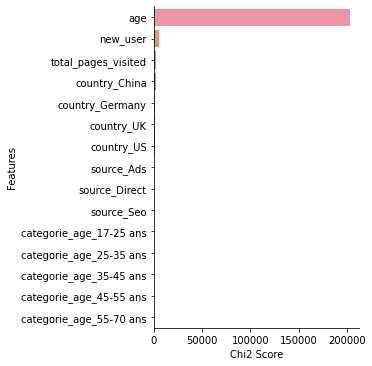

In [86]:
#Représentation des 'feature importance' dans un chart
ax =sns.catplot(x="Chi2 Score", y=[index for index in feature_ranking.index], data = feature_ranking.sort_values("Chi2 Score", ascending=False), kind="bar")
ax.set(xlabel="Chi2 Score", ylabel="Features")
plt.show()

##Prédiction des conversions sans resampling

In [87]:
#dummification des variables catégorielles
dataset=pd.get_dummies(dataset, drop_first=True)

In [88]:
#séparation du dataset en deux
X=dataset.drop('converted', axis=1)
y=dataset['converted']

In [89]:
#séparation du dataset en un train set et un test set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, stratify=y)

In [90]:
#normalisation
from sklearn.preprocessing import StandardScaler
sc_x = StandardScaler()
X_train = sc_x.fit_transform(X_train)
X_test = sc_x.transform(X_test)

In [91]:
#création du modèle de régression
from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression()
classifier.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [92]:
#Evaluation du modèle
print("Train score: {}" .format(classifier.score(X_train, y_train)))
print("Test score: {}" .format(classifier.score(X_test, y_test)))

Train score: 0.9861478824241657
Test score: 0.9862534261016235


In [93]:
#prédiction pour les valeurs de X_test
y_pred = classifier.predict(X_test)

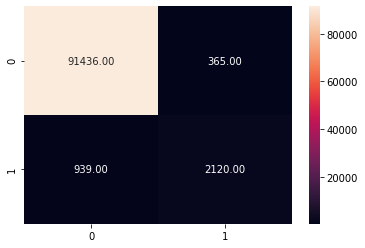

In [94]:
#Matrice de confusion
from sklearn.metrics import confusion_matrix
cm=confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt=".2f")

In [95]:
from sklearn.metrics import classification_report
print(classification_report(y_true=y_test, y_pred=classifier.predict(X_test)))

              precision    recall  f1-score   support

           0       0.99      1.00      0.99     91801
           1       0.85      0.69      0.76      3059

    accuracy                           0.99     94860
   macro avg       0.92      0.84      0.88     94860
weighted avg       0.99      0.99      0.99     94860



TP et FN => Recall


TP et FP  => Precision

##Prédiction des conversions avec resampling

In [96]:
df = pd.read_csv('conversion_data.csv')
df.head()

,country,age,new_user,source,total_pages_visited,converted
0,UK,25,1,Ads,1,0
1,US,23,1,Seo,5,0
2,US,28,1,Seo,4,0
3,China,39,1,Seo,5,0
4,US,30,1,Seo,6,0


In [97]:
#Resampling

from sklearn.utils import resample

# Separate input features and target
y = df.converted
X = df.drop('converted', axis=1)
X=pd.get_dummies(X)

# setting up testing and training sets
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)


In [98]:
X.head()

,age,new_user,total_pages_visited,country_China,country_Germany,country_UK,country_US,source_Ads,source_Direct,source_Seo
0,25,1,1,0,0,1,0,1,0,0
1,23,1,5,0,0,0,1,0,0,1
2,28,1,4,0,0,0,1,0,0,1
3,39,1,5,1,0,0,0,0,0,1
4,30,1,6,0,0,0,1,0,0,1


In [99]:
# concatenate our training data back together
Train = pd.concat([X_train, y_train], axis=1)

In [100]:
# separate minority and majority classes
not_converted = Train[Train.converted==0]
converted = Train[Train.converted==1]

In [101]:
# upsample minority
converted_upsampled = resample(converted,
                          replace=True, # sample with replacement
                          n_samples=len(not_converted) )

In [102]:
# combine majority and upsampled minority
upsampled = pd.concat([not_converted, converted_upsampled])

In [103]:
upsampled.converted.value_counts()

1    214152
0    214152
Name: converted, dtype: int64

In [104]:
# trying logistic regression again with the balanced dataset
y_train = upsampled.converted
X_train = upsampled.drop('converted', axis=1)

In [105]:
from sklearn.preprocessing import StandardScaler
sc_x = StandardScaler()
X_train = sc_x.fit_transform(X_train)
X_test = sc_x.transform(X_test)

In [106]:
from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression()
classifier.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [107]:
y_pred=classifier.predict(X_test)

In [108]:
classifier.score(X_test, y_test)

0.9424309508749736

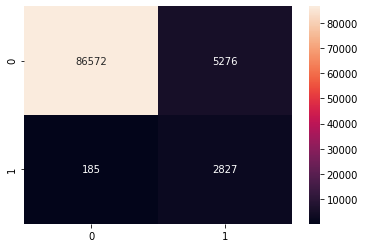

In [109]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt="d")

In [110]:
from sklearn.metrics import classification_report
print(classification_report(y_true=y_test, y_pred=classifier.predict(X_test)))

              precision    recall  f1-score   support

           0       1.00      0.94      0.97     91848
           1       0.35      0.94      0.51      3012

    accuracy                           0.94     94860
   macro avg       0.67      0.94      0.74     94860
weighted avg       0.98      0.94      0.95     94860



TP et FN => Recall

TP et FP => Precision

In [111]:
from sklearn.feature_selection import chi2
feature_importance = chi2(X, y)
feature_importance 

(array([5.58042574e+03, 2.30914908e+03, 2.02697509e+05, 2.34695073e+03,
        3.82500000e+02, 6.44210526e+02, 1.75257732e+02, 1.40689655e+01,
        3.87887324e+01, 2.01315789e+00]),
 array([0.00000000e+000, 0.00000000e+000, 0.00000000e+000, 0.00000000e+000,
        3.55366590e-085, 4.05710472e-142, 5.25926285e-040, 1.76227698e-004,
        4.72245974e-010, 1.55940432e-001]))

In [112]:
feature_ranking = pd.DataFrame(columns=X.columns, data=feature_importance, index=["Chi2 Score", "P-value"]).transpose().sort_values("Chi2 Score", ascending=False)
feature_ranking

,Chi2 Score,P-value
total_pages_visited,202697.509485,0.000000e+00
age,5580.425744,0.000000e+00
country_China,2346.950732,0.000000e+00
new_user,2309.149077,0.000000e+00
country_UK,644.210526,4.057105e-142
country_Germany,382.500000,3.553666e-85
country_US,175.257732,5.259263e-40
source_Direct,38.788732,4.722460e-10
source_Ads,14.068966,1.762277e-04
source_Seo,2.013158,1.559404e-01


####Grid search

In [113]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import SGDClassifier

tuned_parameters = {'alpha': [10 ** a for a in range(-6, -2)]}
clf = GridSearchCV(SGDClassifier()
                  , tuned_parameters, cv=10)

In [114]:
clf.fit(X_train, y_train)

GridSearchCV(cv=10, error_score=nan,
             estimator=SGDClassifier(alpha=0.0001, average=False,
                                     class_weight=None, early_stopping=False,
                                     epsilon=0.1, eta0=0.0, fit_intercept=True,
                                     l1_ratio=0.15, learning_rate='optimal',
                                     loss='hinge', max_iter=1000,
                                     n_iter_no_change=5, n_jobs=None,
                                     penalty='l2', power_t=0.5,
                                     random_state=None, shuffle=True, tol=0.001,
                                     validation_fraction=0.1, verbose=0,
                                     warm_start=False),
             iid='deprecated', n_jobs=None,
             param_grid={'alpha': [1e-06, 1e-05, 0.0001, 0.001]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=0)

In [115]:
clf.best_params_

{'alpha': 0.001}

In [116]:
clf.best_estimator_.score(X_train,y_train)

0.9401383129739624

In [117]:
clf.best_estimator_.score(X_test,y_test)

0.9428526249209361

In [118]:
print(classification_report(y_test,clf.best_estimator_.predict(X_test)))

              precision    recall  f1-score   support

           0       1.00      0.94      0.97     91848
           1       0.35      0.94      0.51      3012

    accuracy                           0.94     94860
   macro avg       0.67      0.94      0.74     94860
weighted avg       0.98      0.94      0.96     94860



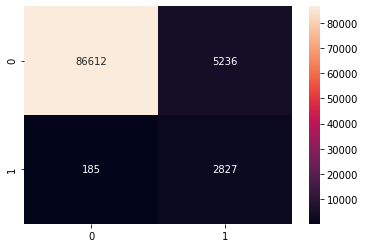

In [119]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, clf.best_estimator_.predict(X_test))
sns.heatmap(cm, annot=True, fmt="d")

